In [1]:
############################################################
# Implementation of the cal_example_zerox.m
# Used to verify the code base works without errors.
############################################################

import numpy as np
import matplotlib.pyplot as plt
import arviz

from mcmc.mcmc import MCMC
from mcmc.data import Data
# from mcmc.chain import Chain
from mcmc.parameter import Parameter

from mcmc.models.kennedyohagan.model2 import Model

# Setup Model

In [2]:
#################
##### MODEL #####
#################

model = Model(
    params={
        'theta': Parameter(
            'theta',
            np.array([0.5]),
            bounded_below=0,
            bounded_above=1,
        ),
        'omega_eta': Parameter(
            'omega_eta',
            np.array([
                np.exp(-50/4), 
                np.exp(-7/4)
            ]),
            bounded_below=0,
            bounded_above=1,
            transform_forwards=lambda beta: np.exp(-beta/4),
            transform_backwards=lambda omega: -4*np.log(omega),
        ),
        'omega_delta': Parameter(
            'omega_delta',
            np.array([
                np.exp(-2/4)
            ]),
            bounded_below=0,
            bounded_above=1,
            transform_forwards=lambda beta: np.exp(-beta/4),
            transform_backwards=lambda omega: -4*np.log(omega),
        ),
        'lambda_eta': Parameter(
            'lambda_eta',
            np.array([1]),
            positive=True,
        ),
        'lambda_delta': Parameter(
            'lambda_delta',
            np.array([30]),
            positive=True,
        ),
        'lambda_epsilon': Parameter(
            'lambda_epsilon',
            np.array([1000]),
            positive=True,
        ),
        'lambda_epsilon_eta': Parameter(
            'lambda_epsilon_eta',
            np.array([10000]),
            positive=True,
        )
    }
)

# Setup Data

In [3]:

################
##### DATA #####
################

DATAFIELD = np.loadtxt('data/simple_field.csv', delimiter=',', dtype=np.float32)
DATACOMP = np.loadtxt('data/simple_comp.csv', delimiter=',', dtype=np.float32)

xf = np.reshape(DATAFIELD[:, 0], (-1, 1))
xc = np.reshape(DATACOMP[:, 0], (-1,1))
tc = np.reshape(DATACOMP[:, 1], (-1,1))
yf = np.reshape(DATAFIELD[:, 1], (-1,1))
yc = np.reshape(DATACOMP[:, 2], (-1,1))



#Standardize full response using mean and std of yc
yc_mean = np.mean(yc)
yc_std = np.std(yc)
x_min = min(xf.min(), xc.min())
x_max = max(xf.max(), xc.max())
t_min = tc.min()
t_max = tc.max()

xf_normalized = (xf - x_min)/(x_max - x_min)
xc_normalized = (xc - x_min)/(x_max - x_min)
# tc_normalized = np.zeros_like(tc)
# for k in range(tc.shape[1]):
#     tc_normalized[:, k] = (tc[:, k] - np.min(tc[:, k]))/(np.max(tc[:, k]) - np.min(tc[:, k]))
tc_normalized = (tc - t_min)/(t_max - t_min)
yc_standardized = (yc - yc_mean)/yc_std
yf_standardized = (yf - yc_mean)/yc_std

data = Data(
    x_c = xc_normalized, 
    t   = tc_normalized,
    y   = yc_standardized,
    x_f = xf_normalized,
    z   = yf_standardized
)

# Run MCMC

In [4]:
################
##### MCMC #####
################

proposal_widths = {
    'theta': [0.25],
    'omega_eta': [0.000001, 0.3],
    'omega_delta': [0.7],
    'lambda_eta': 0.15,
    'lambda_epsilon_eta': 10000,
    'lambda_delta': 40,
    'lambda_epsilon': 5000
}

mcmc = MCMC(
    max_iter = 5000,
    model = model,
    data = data,
    proposal_widths = proposal_widths
)

mcmc.run()

['theta_0', 'omega_eta_0', 'omega_eta_1', 'omega_delta_0', 'lambda_eta_0', 'lambda_delta_0', 'lambda_epsilon_0', 'lambda_epsilon_eta_0']
Iteration: 0. Log-Posterior: 886.5951564492279
{'theta_0': 0.5, 'omega_eta_0': 3.7266532e-06, 'omega_eta_1': 0.17377394, 'omega_delta_0': 0.60653067, 'lambda_eta_0': 1.0, 'lambda_delta_0': 30.0, 'lambda_epsilon_0': 1000.0, 'lambda_epsilon_eta_0': 10000.0}


/var/folders/01/f78jqwqs1cndg6s_ybjvbqp00000gn/T/ipykernel_21995/2602005464.py:32: RuntimeWarning: invalid value encountered in log
  transform_backwards=lambda omega: -4*np.log(omega),


The eigenvalues of self.V_d are:
[-2.67652879e+00 -2.42634606e+00 -2.05946262e+00 -1.63778984e+00
 -1.22220943e+00 -8.55909135e-01 -5.62627214e-01 -3.48834914e-01
 -2.03627724e-01 -1.12271874e-01 -5.85626787e-02 -2.89308917e-02
 -1.35533761e-02 -6.02940893e-03 -2.54533269e-03 -1.01676027e-03
 -3.79881763e-04 -1.27551403e-04 -7.62070223e-05 -6.72488997e-05
 -5.41754600e-05 -3.91738748e-05 -3.23749327e-05 -2.43660491e-05
 -1.13385300e-05 -9.37147820e-07  1.83428429e-06  6.68256511e-06
  1.18435564e-05  1.35594693e-05  1.50938997e-05  1.70061260e-05
  1.73943461e-05  1.80611016e-05  1.85920485e-05  1.86087086e-05
  1.86134051e-05  1.87427845e-05  1.87678448e-05  1.88021259e-05
  1.88201941e-05  1.88602746e-05  1.88624971e-05  1.88769002e-05
  1.89007325e-05  1.89368574e-05  1.89514518e-05  1.89642131e-05
  1.89938198e-05  1.90011275e-05  1.90265062e-05  1.90399068e-05
  1.90526068e-05  1.90556622e-05  1.90773463e-05  1.90783906e-05
  1.90797056e-05  1.90800037e-05  1.90809681e-05  1.90824

LinAlgError: 11-th leading minor of the array is not positive definite

# Analysis

In [ ]:
####################
##### ANALYSIS #####
####################

mcmc.chain._chain['theta_0'] = mcmc.chain._chain['theta_0']*(t_max - t_min) + t_min
output = mcmc.chain._chain
for item, value in output.items():
    print(item, np.min(value), np.max(value))


arviz.summary(mcmc.chain._chain)

arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


theta_0 0.20105590894945613 0.5989737181938004
omega_eta_0 4.046734829898924e-06 0.0014471366303041577
omega_eta_1 0.022409379482269287 0.999458372592926
omega_delta_0 5.875562419532798e-05 0.9339687824249268
lambda_eta_0 4.428410466061905e-05 0.9280101656913757
lambda_delta_0 2.5071237087249756 30.0
lambda_epsilon_0 987.706298828125 23933.998046875
lambda_epsilon_eta_0 102.3106460571289 10000.0


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta_0,0.416,0.086,0.238,0.559,0.008,0.006,131.0,185.0,NaN
omega_eta_0,0.001,0.000,0.000,0.001,0.000,0.000,1.0,11.0,NaN
omega_eta_1,0.618,0.367,0.095,0.999,0.347,0.404,1.0,34.0,NaN
omega_delta_0,0.373,0.221,0.001,0.723,0.008,0.006,715.0,752.0,NaN
lambda_eta_0,0.006,0.060,0.000,0.002,0.008,0.006,2.0,4.0,NaN
lambda_delta_0,7.344,2.185,3.994,11.302,0.164,0.117,67.0,338.0,NaN
lambda_epsilon_0,10050.551,3289.097,4403.854,16307.615,244.522,181.104,198.0,216.0,NaN
lambda_epsilon_eta_0,118.968,308.805,102.311,130.065,22.684,16.066,4.0,4.0,NaN


In [ ]:
plot_style = {
    'mathtext.fontset': 'cm',
    'font.family': 'serif',
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 8,
    'legend.frameon': False,
    'axes.linewidth': 0.5,
    'lines.linewidth': 0.5,
    'axes.labelpad': 2.,
    'figure.dpi': 150,
}

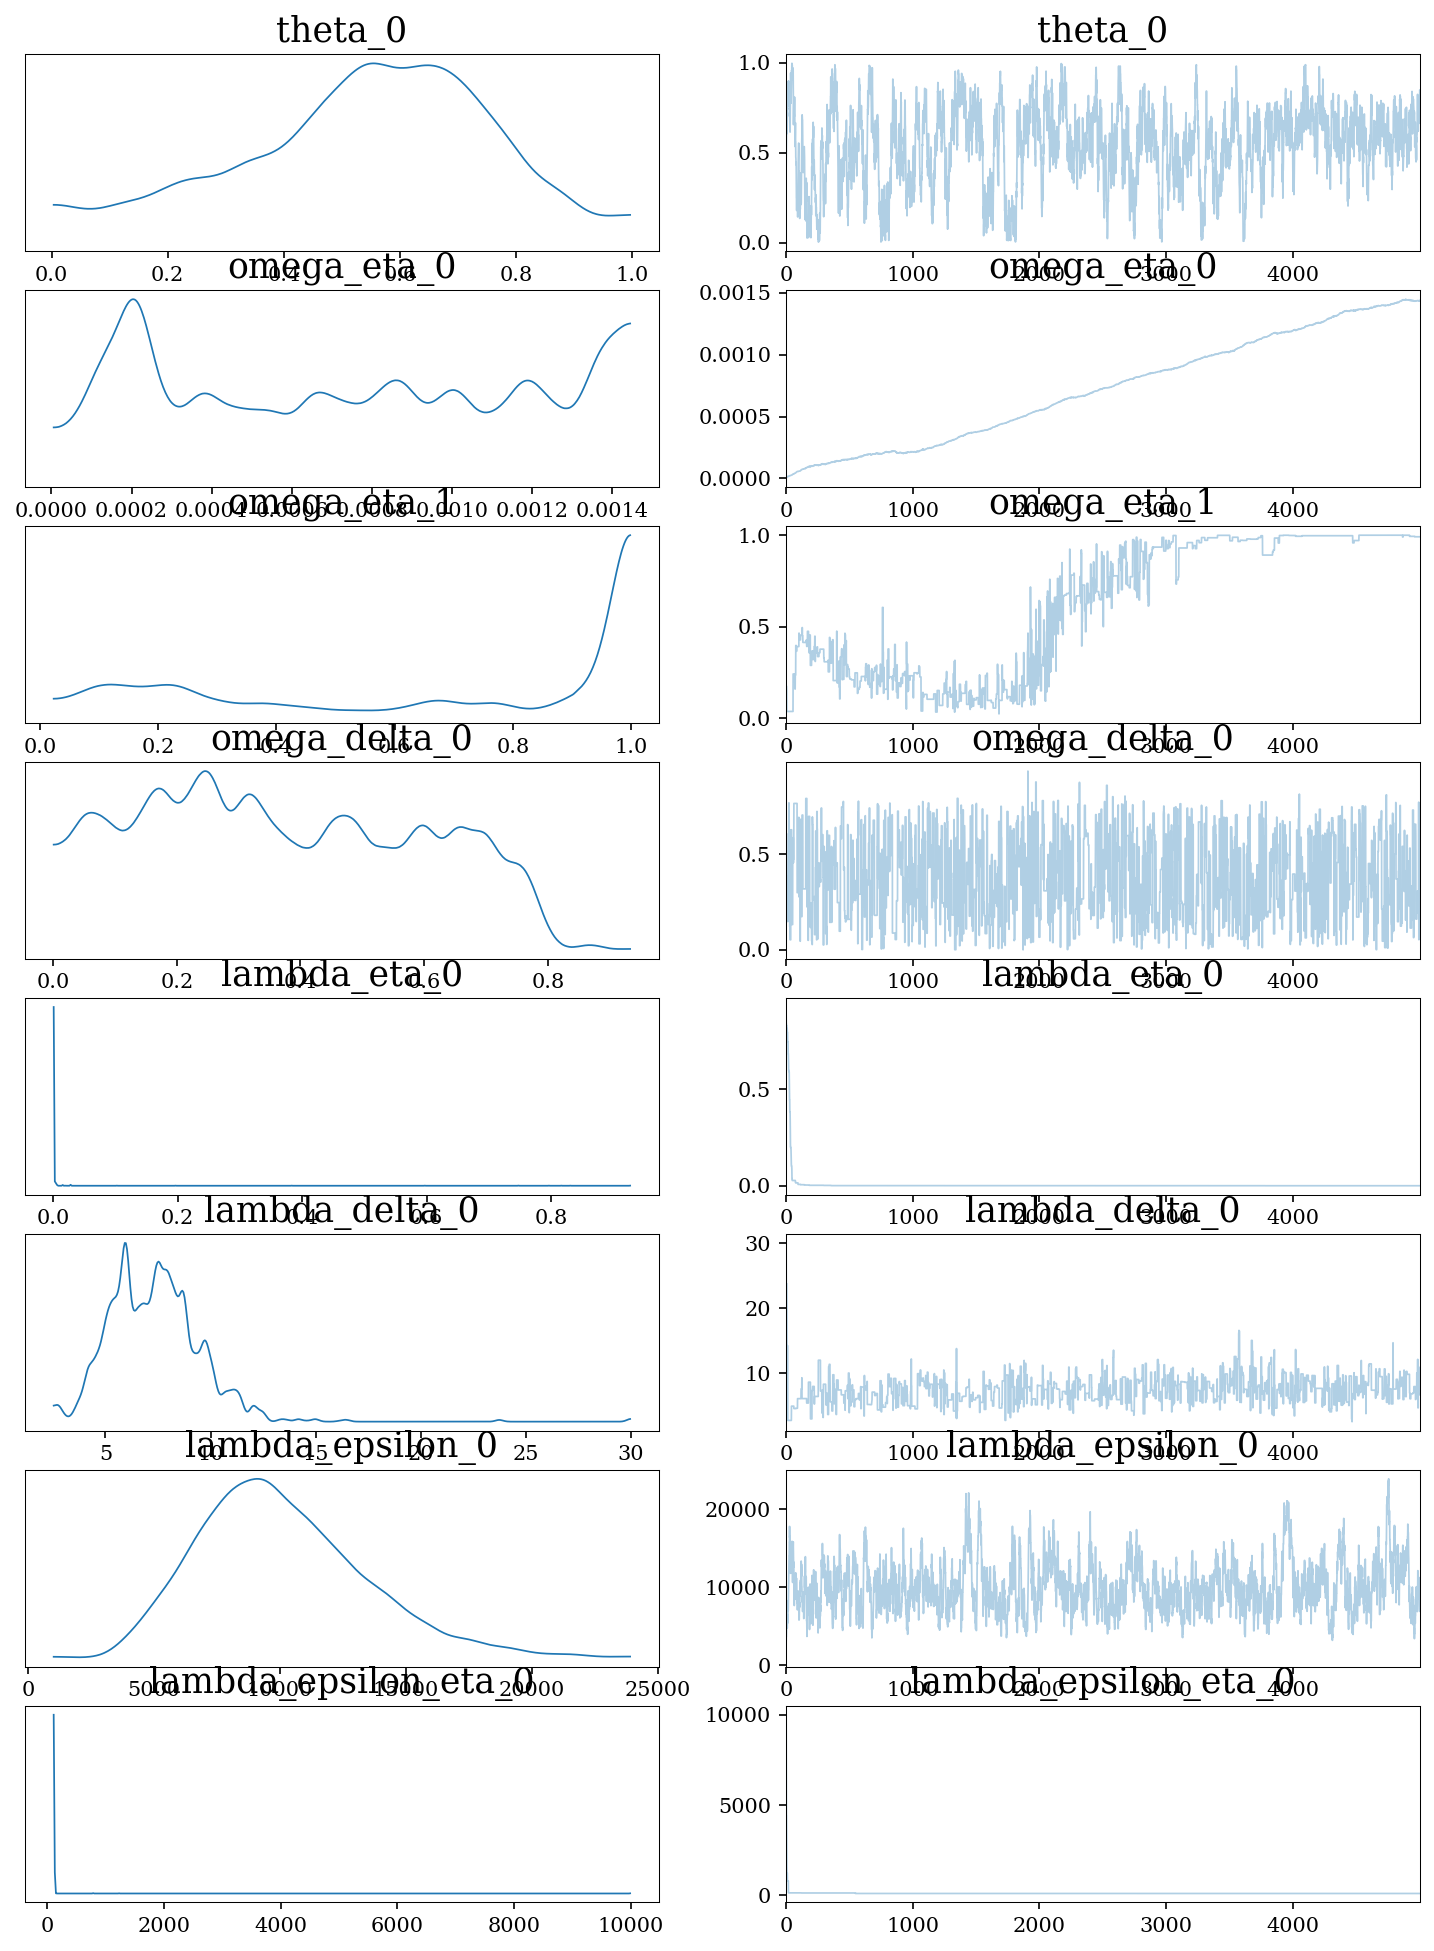

In [ ]:
with plt.style.context(plot_style):
    arviz.plot_trace(
        mcmc.chain._chain
    )